In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FAKE_PATH = 'D:\\Workspace\\NLP\\At school\\Final project\\datasets\\DataSet_Misinfo_FAKE.csv'
TRUE_PATH = 'D:\\Workspace\\NLP\\At school\\Final project\\datasets\\DataSet_Misinfo_TRUE.csv'

df_fake = pd.read_csv(FAKE_PATH)
df_true = pd.read_csv(TRUE_PATH)

In [3]:
df_fake.head(), df_true.head()

(   Unnamed: 0                                               text
 0           0  Donald Trump just couldn t wish all Americans ...
 1           1  House Intelligence Committee Chairman Devin Nu...
 2           2  On Friday, it was revealed that former Milwauk...
 3           3  On Christmas day, Donald Trump announced that ...
 4           4  Pope Francis used his annual Christmas Day mes...,
    Unnamed: 0                                               text
 0           0  The head of a conservative Republican faction ...
 1           1  Transgender people will be allowed for the fir...
 2           2  The special counsel investigation of links bet...
 3           3  Trump campaign adviser George Papadopoulos tol...
 4           4  President Donald Trump called on the U.S. Post...)

In [4]:
df_fake.drop("Unnamed: 0", axis=1, inplace=True)
df_true.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df_fake['label'] = 0
df_true['label'] = 1

df = pd.concat([df_fake, df_true], ignore_index=True)

In [6]:
df = df.dropna()

In [7]:
df.shape

(78588, 2)

In [8]:
df['clean_text'] = df['text'].str.lower().str.strip()

duplicated_texts = df[df.duplicated(subset='clean_text', keep=False)]

print("The shape of data:", df.shape)

# Remove duplicated texts 
df = df.drop_duplicates(subset = 'clean_text', keep = 'first').drop(columns = 'clean_text')

print("The shape of data after dropping duplicates:", df.shape)

The shape of data: (78588, 3)
The shape of data after dropping duplicates: (68600, 2)


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|<.*?>", "", text)  # Remove URLs/HTML
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # Keep only letters
    text = unidecode(text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [11]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [12]:
df.sample(3)

,text,label,clean_text
38728,Georgian nation expressed its opinion by this ...,0,georgian nation expressed opinion voting presi...
4668,Marine Corps Veteran Frank Biggio appreciates ...,0,marine corp veteran frank biggio appreciates r...
77533,How Rich Candidates Try To Appeal To Working V...,1,rich candidate try appeal working voter donald...


In [13]:
X = [x.split() for x in df['clean_text'].to_list()]
y = df['label'].values

In [14]:
print(X[0])

['donald', 'trump', 'wish', 'american', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pant', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'great', 'year', 'america', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expectwhat', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'rise', 'gutter', 'long', 'enough', 'wish', '

### Generate Word Embedding

In [15]:
import gensim

EMBEDDING_DIM = 100
w2v_model =  gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=10, min_count=1)

In [34]:
len(w2v_model.wv)

308304

In [17]:
w2v_model.wv['trump']

array([ 0.7255931 , -1.9050796 ,  0.19104256, -0.08357414, -0.03691032,
       -1.1871941 ,  2.6474073 , -2.3943381 , -0.92528373, -2.139261  ,
        0.2728834 , -1.23029   , -2.6213806 ,  1.6130943 , -3.9184465 ,
        3.9439416 , -3.411047  ,  5.5817084 ,  0.6613123 ,  2.4131954 ,
        2.282067  , -1.1627516 , -0.28344736,  3.1383579 ,  2.1773534 ,
       -2.586758  ,  1.7263389 , -0.3293906 ,  2.6463583 , -1.226589  ,
       -1.4717367 , -2.064893  ,  1.6418289 , -0.24289429, -3.7624352 ,
       -0.72616935,  0.3659905 ,  2.3286307 ,  6.200556  ,  0.41539317,
        2.1202204 , -0.22638313,  1.6629716 , -1.4833922 ,  1.490295  ,
        2.1993659 , -0.4341199 ,  0.90188015,  1.8672462 ,  1.8141214 ,
       -1.6041224 , -2.1986213 ,  1.6484529 , -1.7155503 , -0.602557  ,
       -1.3858746 , -2.9801292 ,  1.14226   ,  2.093237  ,  2.8714929 ,
       -0.36834794,  3.0900693 , -1.8346208 , -1.5365309 ,  4.092284  ,
       -4.2605557 , -0.42151487, -0.21367683,  4.6636057 ,  0.25

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
# Tokenization
tokenizer = Tokenizer(num_words=8000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [22]:
maxlen = 700
X = pad_sequences(X, maxlen=maxlen)

In [35]:
X.shape

(68600, 700)

In [31]:
word_index = tokenizer.word_index

In [40]:
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
            
    return weight_matrix

In [41]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [42]:
embedding_vectors.shape

(308306, 100)

### Generate Sentence Embedding

In [61]:
def get_sentence_embedding(sentence, model, tokenizer, embedding_dim = 100):
    tokens = tokenizer.texts_to_sequences([sentence])[0]
    embedding_vectors = []
    
    for idx in tokens:
        word = tokenizer.index_word.get(idx, None)
        if word and word in model.wv:
            embedding_vectors.append(model.wv[word])
            
    if embedding_vectors:
        return np.mean(embedding_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

In [50]:
tmp = df.sample(10)

In [71]:
sentences = list(df['clean_text'])
labels = list(df['label'])

In [74]:
len(sentences)

68600

In [75]:
sentence_vectors = [get_sentence_embedding(s, w2v_model, tokenizer) for s in sentences]

In [77]:
sentence_vectors[0]

array([-0.28551602, -0.03429444, -0.46597832,  0.21432824,  0.6104798 ,
        0.67618346,  0.6118909 ,  0.6230175 ,  0.40256166, -0.6803489 ,
        0.96192515, -0.20471998, -1.0345197 , -0.20204228, -0.6074122 ,
        0.8199809 , -1.1761835 ,  0.5310254 ,  0.41612497,  0.23227298,
       -0.14663301,  0.27734432,  0.7630665 ,  0.40491077, -0.03119555,
       -0.43366838,  0.09050031, -0.5215988 , -0.00890656,  0.1114659 ,
       -1.2308029 ,  0.5044593 ,  0.04303144,  0.36103085, -1.3935555 ,
        0.8285565 ,  1.0935115 ,  1.0993382 ,  1.2381586 , -0.87086666,
        0.47638988,  0.02965265,  0.52600765,  0.8415161 ,  0.28366527,
        0.34274575, -0.07676245, -0.08666813,  0.2711804 ,  0.7606924 ,
       -0.40924656, -0.25287664,  0.7088239 ,  1.0506779 ,  0.15396596,
       -1.3894774 ,  0.12568493, -0.6657719 ,  0.9505532 ,  0.16494563,
        0.37907264, -0.25607193,  0.8926606 ,  0.19668731,  1.0061646 ,
       -1.5187362 ,  0.20185706, -0.17233327,  0.6890934 , -1.61

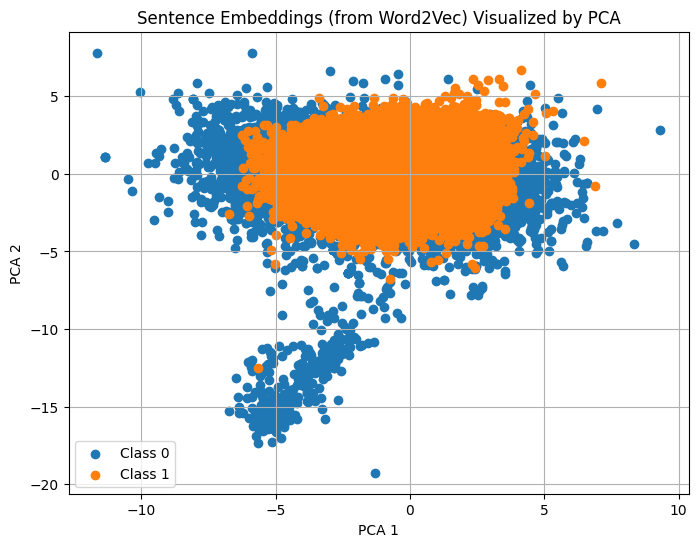

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(sentence_vectors)

plt.figure(figsize=(8, 6))

for label in np.unique(labels):
    idx = np.array(labels) == label
    plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f"Class {label}")

plt.legend()
plt.title("Sentence Embeddings (from Word2Vec) Visualized by PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()